# Importing Libraries

In [28]:
!pip install emoji

In [29]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Definition of Functions

In [30]:
# Extract the Date time
def date_time(s):
    pattern = r'^(\d+/\d+/\d+), (\d+:\d+\s[AP]M) - ([^:]+): (.*)$'
    result=re.match(pattern, s)
    if result:
        return True
    return False

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])

    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message


In [31]:
from google.colab import drive
drive.mount('/content/drive')
!ls -al "/content/drive/MyDrive/Notebooks/chat.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-rw------- 1 root root 14273 Jun  5 13:00 /content/drive/MyDrive/Notebooks/chat.txt


In [32]:
data=[]
conversation='/content/drive/MyDrive/Notebooks/chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# analyse the sentiments

In [33]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

<ipython-input-34-36b836a462c9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])
<ipython-input-34-36b836a462c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
<ipython-input-34-36b836a462c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["nega

,Date,Time,contact,Message,positive,negative,neutral
0,2024-02-21,11:26 AM,Nikita Patil MCA,<Media omitted>,0.0,0.0,1.0
1,2024-02-21,11:26 AM,Nikita Patil MCA,<Media omitted>,0.0,0.0,1.0
2,2024-02-22,11:43 AM,Nikita Patil MCA,<Media omitted>,0.0,0.0,1.0
3,2024-03-02,8:38 PM,NPatil,Hii,0.0,0.0,1.0
4,2024-03-02,8:39 PM,NPatil,Jamasandekar mam ne dileli Mazi pn assignment ...,0.0,0.0,1.0


In [35]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutral")

score(x,y,z)

Neutral


In [36]:
df.contact.unique()

array(['Nikita Patil MCA', 'NPatil', None], dtype=object)

In [37]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [38]:

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)

    return emoji_list

In [39]:
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2024-02-21,11:26 AM,Nikita Patil MCA,<Media omitted>,[]
1,2024-02-21,11:26 AM,Nikita Patil MCA,<Media omitted>,[]
2,2024-02-22,11:43 AM,Nikita Patil MCA,<Media omitted>,[]
3,2024-03-02,8:38 PM,NPatil,Hii,[]
4,2024-03-02,8:39 PM,NPatil,Jamasandekar mam ne dileli Mazi pn assignment ...,[]
5,2024-03-02,8:39 PM,NPatil,Moodle varachi,[]
6,2024-03-03,9:13 AM,NPatil,<Media omitted>,[]
7,2024-03-03,11:12 AM,Nikita Patil MCA,Done,[]
8,2024-03-03,11:15 AM,NPatil,Thank you 😘,[😘]
9,2024-03-07,10:53 AM,NPatil,Java che parva 2 programs upload kelas ti word...,[]


In [40]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('🥰', 3)
('🤣', 3)
('😒', 2)
('😘', 1)
('🧐', 1)
('😊', 1)
('🤪', 1)
('🤩', 1)
('😔', 1)
('🙃', 1)
('😌', 1)


In [41]:
from wordcloud import WordCloud, STOPWORDS


There are 6896 words in all the messages.


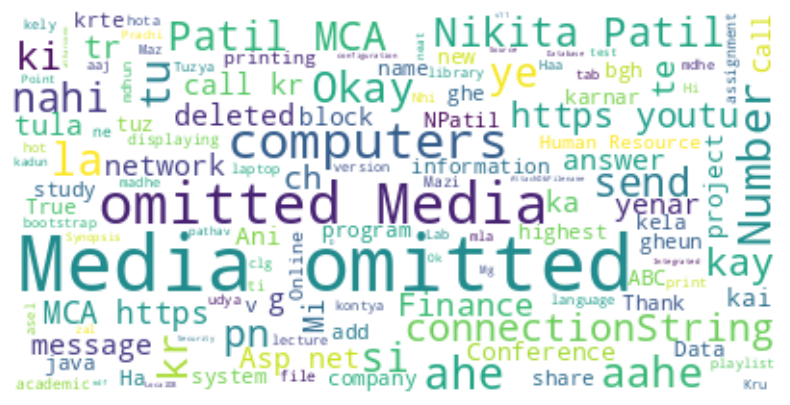

In [42]:
# Check if df is empty
if df.empty:
    print("DataFrame is empty. Please check your data loading or filtering.")
else:
    # Check if there are any messages after joining
    text = " ".join(review for review in df.Message)
    if text.strip() == "":
        print("No text found in 'Message' column. Please check your data.")
    else:
        # Proceed with wordcloud generation
        print ("There are {} words in all the messages.".format(len(text)))
        stopwords = set(STOPWORDS)
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
        plt.figure( figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

There are 6896 words in all the messages.


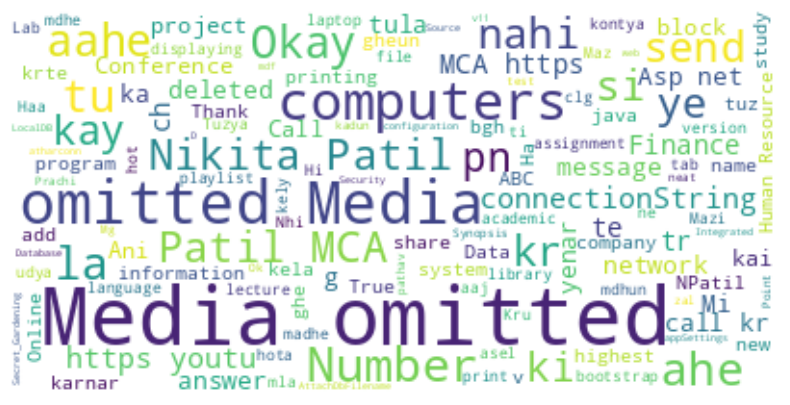

In [43]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()